In [1]:
import numpy as np
import visualkeras as vk 
import pandas as pd
import seaborn as sn
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# FIXED: Import directly from tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [2]:
train_data = np.load("../numpy/train_data.npy")
test_data = np.load("../numpy/test_data.npy")
train_labels = np.load("../numpy/train_labels.npy")
test_labels = np.load("../numpy/test_labels.npy")

In [3]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(36, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# ... previous model layers ...
model.add(Dense(36, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# FIXED: Explicitly build model so visualkeras can see shapes
model.build(input_shape=(None, 28, 28, 1)) 

# 2. Patch the model layers for visualkeras compatibility
for layer in model.layers:
    # If the layer has an output tensor, assign its shape to the attribute visualkeras expects
    if hasattr(layer, 'output'):
        # Keras 3 uses 'shape', visualkeras expects 'output_shape'
        layer.output_shape = layer.output.shape

# 3. Now run the visualization
vk.layered_view(model, legend=True)

model.summary()


model.summary()

c:\Users\mites\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mites\AppData\Local\Programs\Python\Python311\Lib\site-packages\visualkeras\layered.py:231: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 20, 20, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 20, 20, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         9,252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         1,332 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 856,888 (3.27 MB)

 Trainable params: 856,696 (3.27 MB)

 Non-trainable params: 192 (768.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 20, 20, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 20, 20, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         9,252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         1,332 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 856,888 (3.27 MB)

 Trainable params: 856,696 (3.27 MB)

 Non-trainable params: 192 (768.00 B)

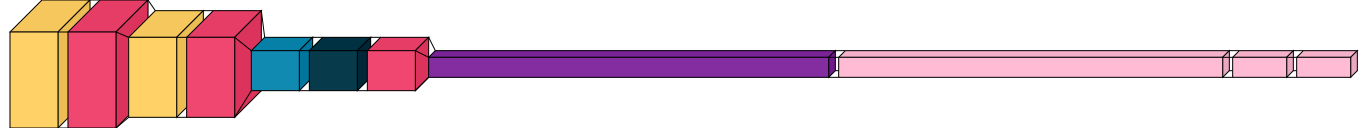

In [4]:
vk.layered_view(model)

In [5]:
# FIXED: Changed extensions from .h5 to .weights.h5
best_loss_checkpoint = ModelCheckpoint(
    filepath="../models/best_loss_model.weights.h5",
    monitor="loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath="../models/best_val_loss_model.weights.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

In [6]:
history = model.fit(
    train_data,
    train_labels,
    validation_data=(test_data, test_labels), 
    epochs=10, 
    batch_size=200, 
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 111s 62ms/step - accuracy: 0.5228 - loss: 2.2460 - val_accuracy: 0.5433 - val_loss: 1.6062
Epoch 2/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 108s 61ms/step - accuracy: 0.5455 - loss: 1.4348 - val_accuracy: 0.5436 - val_loss: 1.3346
Epoch 3/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 108s 61ms/step - accuracy: 0.5467 - loss: 1.2734 - val_accuracy: 0.5464 - val_loss: 1.2362
Epoch 4/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 114s 64ms/step - accuracy: 0.5490 - loss: 1.2205 - val_accuracy: 0.5482 - val_loss: 1.2108
Epoch 5/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 121s 68ms/step - accuracy: 0.5500 - loss: 1.1991 - val_accuracy: 0.5502 - val_loss: 1.1903
Epoch 6/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 124s 70ms/step - accuracy: 0.5777 - loss: 1.1356 - val_accuracy: 0.6053 - val_loss: 1.0698
Epoch 7/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 124s 70ms/step - accuracy: 0.6065 - loss: 1.0357 - val_accuracy: 0.6071 - val_loss: 1.0248
Epoch 8/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 120s 68ms/step - accuracy: 

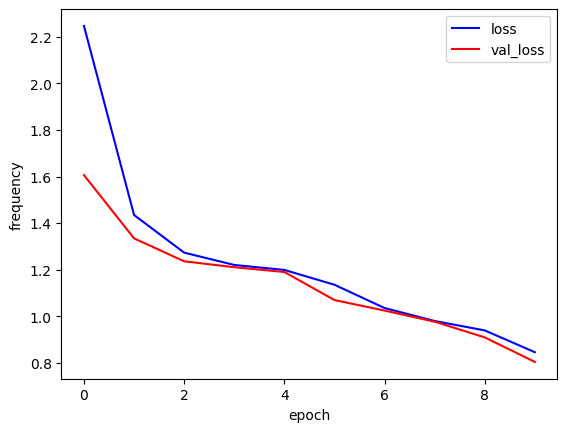

In [7]:
plt.plot(history.history["loss"], 'b', label="loss")
plt.plot(history.history["val_loss"], 'r', label="val_loss")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

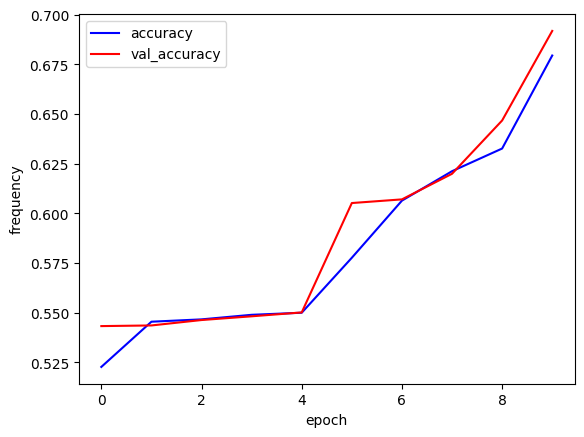

In [8]:
# Use 'accuracy' and 'val_accuracy' instead of 'acc' and 'val_acc'
plt.plot(history.history["accuracy"], 'b', label="accuracy")
plt.plot(history.history["val_accuracy"], 'r', label="val_accuracy")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [9]:
# Update this cell later in the notebook
model.load_weights("../models/best_val_loss_model.weights.h5")

In [10]:
loss, acc = model.evaluate(test_data, test_labels)
print(loss, acc)

2766/2766 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6919 - loss: 0.8045
0.8044971823692322 0.6918860673904419


In [11]:
predictions = model.predict(test_data)

2766/2766 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


In [12]:
confusion = confusion_matrix(
    np.argmax(test_labels, axis=1),
    np.argmax(predictions, axis=1)
)
print(confusion)

[[2731    0    3 ...    0    1    1]
 [   6   22    7 ...    0    2    0]
 [   2    0 4636 ...    0    0    0]
 ...
 [   6    0    0 ...    7    0   19]
 [1303    4    3 ...    1    0   10]
 [   2    0    0 ...    0    2 1327]]


<Axes: xlabel='predicted', ylabel='actual'>

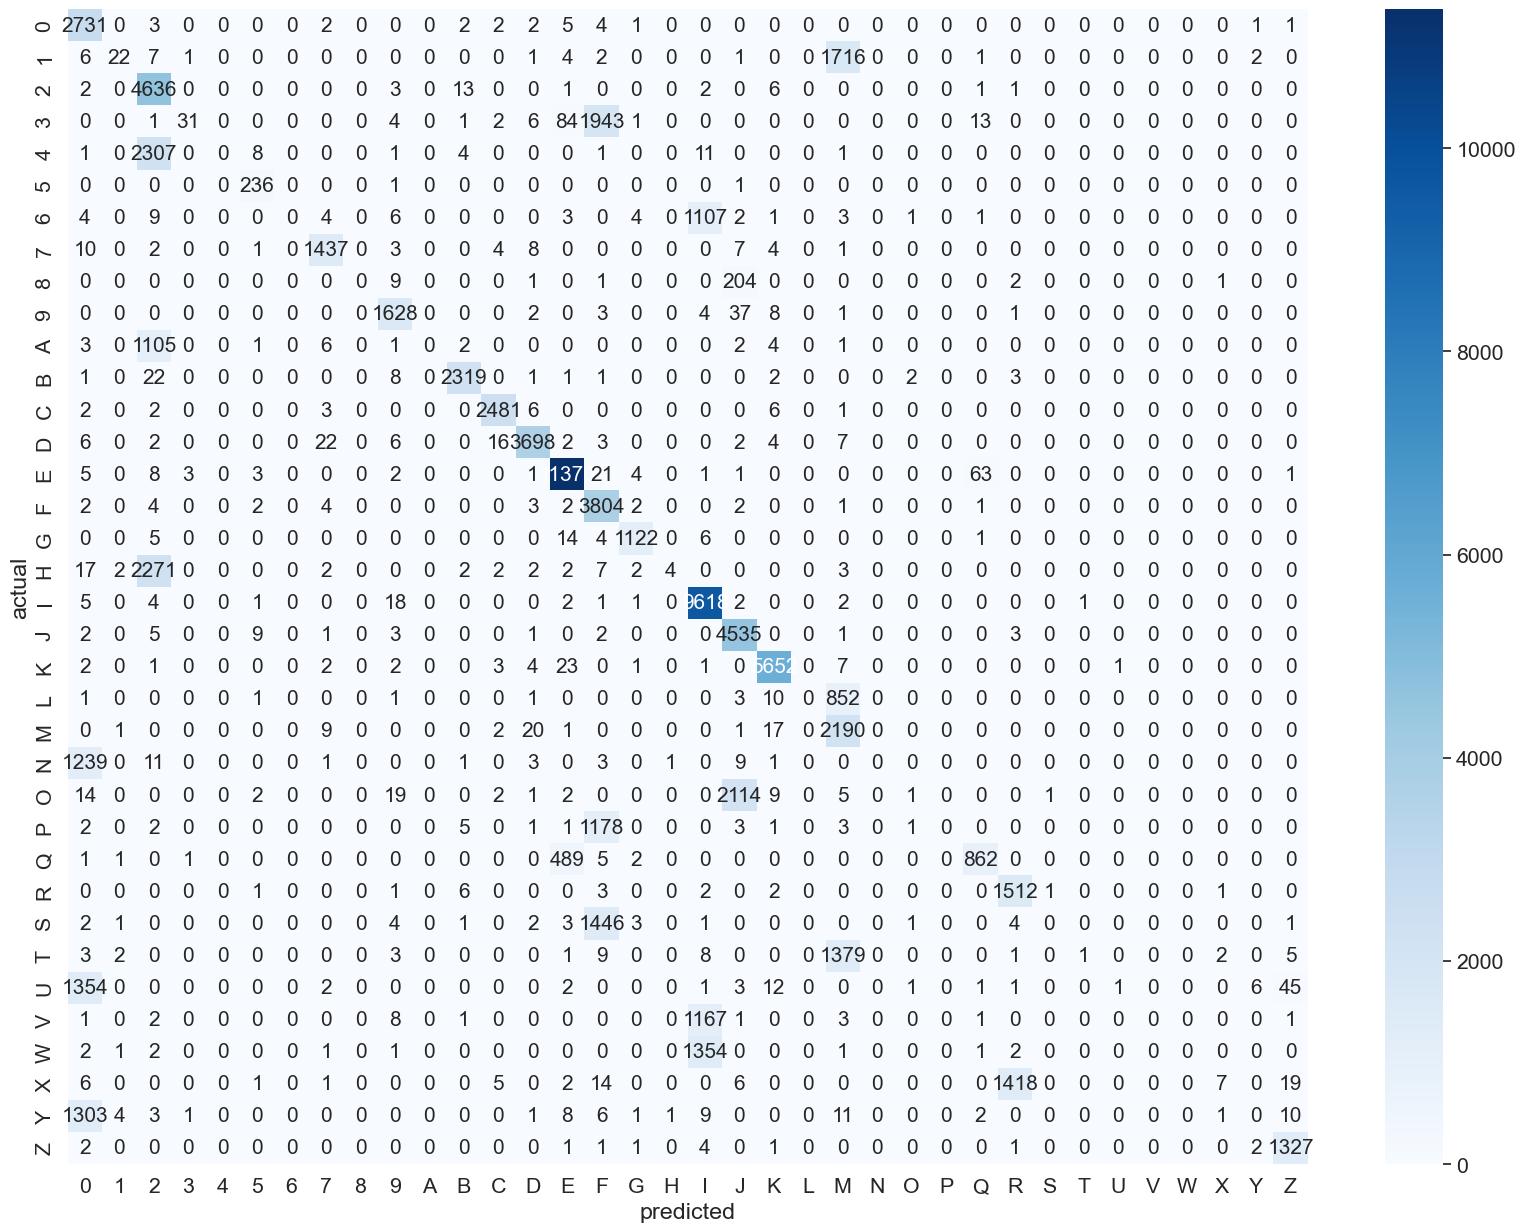

In [13]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (20,15))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")